<div class="alert alert-block alert-info"><b></b>
<h1><center> <font color='black'> Homework 05  </font></center></h1>
<h2><center> <font color='black'> A/B Testing &  Uplift modelling </font></center></h2>   

### The homework is divided into four sections and the points are distributed as below:
<pre>
- A/B Testing               -> 5.0 points
- Uplift modeling           -> 5.0 points
________________________________________________
Total                       -> 10.0 points
</pre>

# 1. A/B Testing (5 points)


**1.1 Use `AB_clicks.csv` data and find whether Learn, Help, and Services versions of the page compared to the Interact have significantly more (or less) clicks. Justify the choice of the performed tests and interpret the result of the test. (1.5 points)** 

In [ ]:
# libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # For creating plots
import matplotlib.ticker as mtick # For specifying the axes tick format 
import matplotlib.pyplot as plt # For creating plots
%matplotlib inline 


#Let's make this notebook reproducible, you can use any number ex = 42
np.random.seed(42)


# set plot style for all plots
plt.style.use('ggplot')

df  = pd.read_csv('AB_clicks.csv', sep='\t')
df.head(100)

,Element_ID,Tag_name,Name,No_clicks,Visible,Version
0,128,area,Montana State University - Home,1291,False,Interact
1,69,a,FIND,842,True,Interact
2,61,input,s.q,508,True,Interact
3,67,a,lib.montana.edu/find/,166,True,Interact
4,78,a,REQUEST,151,True,Interact
...,...,...,...,...,...,...
95,15,div,"Explore the world, explore the past Science & ...",3,True,Connect
96,47,span,nav-item-dot,3,True,Connect
97,49,a,nav-item,3,True,Connect
98,65,form,Search,3,True,Connect


In [ ]:
# check for missing values or unclean data
df.isnull().sum()

Element_ID    0
Tag_name      0
Name          0
No_clicks     0
Visible       0
Version       0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Element_ID  299 non-null    int64 
 1   Tag_name    299 non-null    object
 2   Name        299 non-null    object
 3   No_clicks   299 non-null    int64 
 4   Visible     299 non-null    bool  
 5   Version     299 non-null    object
dtypes: bool(1), int64(2), object(3)
memory usage: 12.1+ KB


In [ ]:
print(f"Numbers of versions is {len(df.Version.unique())}: {df.Version.unique()}")

Numbers of versions is 5: ['Interact' 'Connect' 'Learn' 'Help' 'Services']


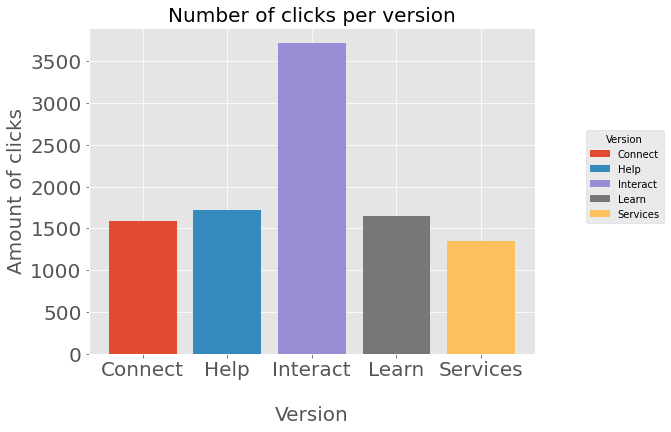

In [ ]:
###### Amount of the clicks on the sites on all buttons #####

# group data by Version
groups = df.groupby('Version')

# plot 
fig, ax = plt.subplots(figsize=(8, 6))

clicks =[] # clicks for each version

# plot line for each customer 
for Version, group in groups:
    ax.bar(group.Version, sum(group.No_clicks), label=Version)
    clicks.append(sum(group.No_clicks))


# put the legend outside the graph
ax.legend(bbox_to_anchor=(1.3, 0.7), title="Version",)
    
    
# set titles for figure, x, y
plt.title('Number of clicks per version',fontsize=20)
plt.xlabel('\nVersion', fontsize=20)
plt.ylabel('Amount of clicks',fontsize=20)


plt.xticks(fontsize = 20) 
plt.yticks(fontsize = 20) 
plt.grid(True)
plt.show()

According to the plot, we can say that `Interact` button has more clicks in total than others.

In [ ]:
clicks = []
for Version,group in groups:
    clicks.append(sum(group.No_clicks))
    print(f"no of clicks in version: {Version} is {sum(group.No_clicks)}")
    
clicks

no of clicks in version: Connect is 1587
no of clicks in version: Help is 1717
no of clicks in version: Interact is 3714
no of clicks in version: Learn is 1652
no of clicks in version: Services is 1348


[1587, 1717, 3714, 1652, 1348]

In [ ]:
df.head()

,Element_ID,Tag_name,Name,No_clicks,Visible,Version
0,128,area,Montana State University - Home,1291,False,Interact
1,69,a,FIND,842,True,Interact
2,61,input,s.q,508,True,Interact
3,67,a,lib.montana.edu/find/,166,True,Interact
4,78,a,REQUEST,151,True,Interact


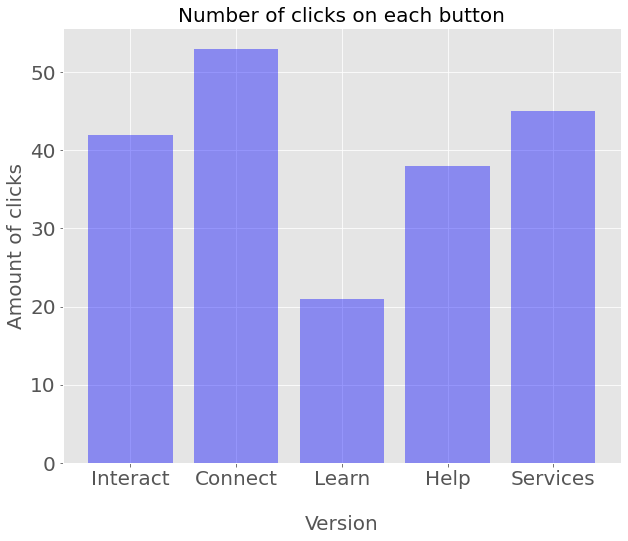

In [ ]:
# filter our data based on buttons name
btn_names = ["INTERACT", "LEARN", "CONNECT", "HELP", "SERVICES"] # btn Interact with different names 

newdf = df[df['Name'].isin(btn_names)] # filter data based on btn names 


# Plot
fig, ax = plt.subplots(figsize=(10, 8))

ax.bar(newdf.Version, newdf.No_clicks, color='b', alpha = 0.4)
    
    
# set titles for figure, x, y
plt.title('Number of clicks on each button',fontsize=20)
plt.xlabel('\nVersion', fontsize=20)
plt.ylabel('Amount of clicks',fontsize=20)


plt.xticks(fontsize = 20) 
plt.yticks(fontsize = 20) 
plt.grid(True)
plt.show()

According to this plot,we can see that `Interact` version has less number of clicks in comparison with the previous plot.

It is difficult to say if `Interact `version is good or not, so we need to apply the A/B testing to check our hypothesis.

**What is our hypothesis?**

*Null hypothesis  (H0) :* there is no difference between version `A: Interact` and version `B: Learn / Help / Services`.

*Alternative hypothesis  (Ha):*  there is a difference between version `A: Interact` and version `B: Learn / Help / Services`.

In [ ]:
##### t-test #####

# filter data by Tag_name == area
# df_filter = df_cleaned
df_filter =  df['Tag_name']!='area'
df_filter = df[df_filter]
df_filter

,Element_ID,Tag_name,Name,No_clicks,Visible,Version
1,69,a,FIND,842,True,Interact
2,61,input,s.q,508,True,Interact
3,67,a,lib.montana.edu/find/,166,True,Interact
4,78,a,REQUEST,151,True,Interact
5,98,a,Hours,102,True,Interact
...,...,...,...,...,...,...
294,116,div,Â© MSU About MSU Library Accessibility Contact...,1,True,Services
295,130,div,lib.montana.edu/interact/,1,False,Services
296,131,center,lib.montana.edu/hours/,1,False,Services
297,132,font,ì§€ì €ê·€ë‹¤,1,False,Services


In [ ]:
# get only data about our two version Interact, and Learn
df_interact_learn = (df_filter['Version']=='Interact') | (df_filter['Version']=='Learn')
df_interact_learn = df_filter[df_interact_learn]

df_interact_learn.head(10)

,Element_ID,Tag_name,Name,No_clicks,Visible,Version
1,69,a,FIND,842,True,Interact
2,61,input,s.q,508,True,Interact
3,67,a,lib.montana.edu/find/,166,True,Interact
4,78,a,REQUEST,151,True,Interact
5,98,a,Hours,102,True,Interact
6,62,button,Search,101,True,Interact
7,118,a,MSU,55,True,Interact
8,50,span,nav-item-dot,46,True,Interact
9,87,a,INTERACT,42,True,Interact
10,76,a,lib.montana.edu/request/,38,True,Interact


In [ ]:
# get only data about our two version Interact, and Help
df_interact_help = (df_filter['Version']=='Interact') | (df_filter['Version']=='Help')
df_interact_help = df_filter[df_interact_help]

df_interact_help.head(10)

,Element_ID,Tag_name,Name,No_clicks,Visible,Version
1,69,a,FIND,842,True,Interact
2,61,input,s.q,508,True,Interact
3,67,a,lib.montana.edu/find/,166,True,Interact
4,78,a,REQUEST,151,True,Interact
5,98,a,Hours,102,True,Interact
6,62,button,Search,101,True,Interact
7,118,a,MSU,55,True,Interact
8,50,span,nav-item-dot,46,True,Interact
9,87,a,INTERACT,42,True,Interact
10,76,a,lib.montana.edu/request/,38,True,Interact


In [ ]:
# get only data about our two version Interact, and Services
df_interact_services = (df_filter['Version']=='Interact') | (df_filter['Version']=='Services')
df_interact_services = df_filter[df_interact_services]

df_interact_services.head(10)

,Element_ID,Tag_name,Name,No_clicks,Visible,Version
1,69,a,FIND,842,True,Interact
2,61,input,s.q,508,True,Interact
3,67,a,lib.montana.edu/find/,166,True,Interact
4,78,a,REQUEST,151,True,Interact
5,98,a,Hours,102,True,Interact
6,62,button,Search,101,True,Interact
7,118,a,MSU,55,True,Interact
8,50,span,nav-item-dot,46,True,Interact
9,87,a,INTERACT,42,True,Interact
10,76,a,lib.montana.edu/request/,38,True,Interact


In [ ]:
from plotly.figure_factory import create_table as ct

# to get different test statistics in python 
from scipy import stats
import scipy

In [ ]:
# Interact and Learn

sample1_interact = df_interact_learn[df_interact_learn['Version']=='Interact']
sample2_learn = df_interact_learn[df_interact_learn['Version']=='Learn']

twosample_results = stats.ttest_ind(sample1_interact['No_clicks'], sample2_learn['No_clicks'])

if twosample_results[1] < 0.05: # alpha = 0.05
    s = "Reject the Null Hypothesis"# p-value < alpha (L.S)
else:
    s = "Accept the Null Hypothesis"# p-value > alpha (L.S)

matrix_twosample = [
    ['', 'Test Statistic', 'p-value', 'comment'],
    ['Sample#2 Data', twosample_results[0], twosample_results[1], s]
]

twosample_table = ct(matrix_twosample, index=True)
twosample_table

We can conclude that we shall accept the Null Hypothesis, according to which there is no difference between version `A: Interact` and version `B: Learn`.

In [ ]:
# Interact and Help

sample1_interact = df_interact_help[df_interact_help['Version']=='Interact']
sample2_help = df_interact_help[df_interact_help['Version']=='Help']

twosample_results = stats.ttest_ind(sample1_interact['No_clicks'], sample2_help['No_clicks'])

if twosample_results[1] < 0.05: # alpha = 0.05
    s = "Reject the Null Hypothesis"# p-value < alpha (L.S)
else:
    s = "Accept the Null Hypothesis"# p-value > alpha (L.S)

matrix_twosample = [
    ['', 'Test Statistic', 'p-value', 'comment'],
    ['Sample#2 Data', twosample_results[0], twosample_results[1], s]
]

twosample_table = ct(matrix_twosample, index=True)
twosample_table

We can conclude that we shall accept the Null Hypothesis, according to which there is no difference between version `A: Interact` and version `B: Help`.

In [ ]:
# Interact and Services

sample1_interact = df_interact_services[df_interact_services['Version']=='Interact']
sample2_services = df_interact_services[df_interact_services['Version']=='Services']

twosample_results = stats.ttest_ind(sample1_interact['No_clicks'], sample2_services['No_clicks'])

if twosample_results[1] < 0.05: # alpha = 0.05
    s = "Reject the Null Hypothesis"# p-value < alpha (L.S)
else:
    s = "Accept the Null Hypothesis"# p-value > alpha (L.S)

matrix_twosample = [
    ['', 'Test Statistic', 'p-value', 'comment'],
    ['Sample#2 Data', twosample_results[0], twosample_results[1], s]
]

twosample_table = ct(matrix_twosample, index=True)
twosample_table

We can conclude that we shall accept the Null Hypothesis, according to which there is no difference between version `A: Interact` and version `B: Services`.

According to t-test, there is no difference between `Interact` and `Learn / Help / Services`. But we can not rely on this test now, because t-test assumes that data is distributed normally.


**1.2 Use two different methods to test the normality of two different versions of your choice (Connect, Help, Services,..) (2.0 points)**





Text(0.5, 1.0, 'Distribution of No_clicks')

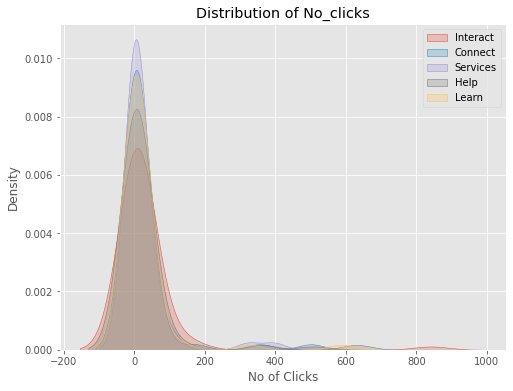

In [ ]:
# check data distribution

fig, ax = plt.subplots(figsize=(8, 6))

ax = sns.kdeplot(df_filter.No_clicks[(df_filter["Version"] == 'Interact') ],
                 shade = True)
ax = sns.kdeplot(df_filter.No_clicks[(df_filter["Version"] == 'Connect') ],
                ax =ax,  shade= True)
ax = sns.kdeplot(df_filter.No_clicks[(df_filter["Version"] == 'Services') ],
                 shade = True)
ax = sns.kdeplot(df_filter.No_clicks[(df_filter["Version"] == 'Help') ],
                ax =ax,  shade= True)
ax = sns.kdeplot(df_filter.No_clicks[(df_filter["Version"] == 'Learn') ],
                ax =ax,  shade= True)
   

ax.legend(["Interact","Connect", "Services", "Help", "Learn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('No of Clicks')
#ax.set_xscale('log')
ax.set_title('Distribution of No_clicks')

Text(0.5, 1.0, 'Distribution of No_clicks')

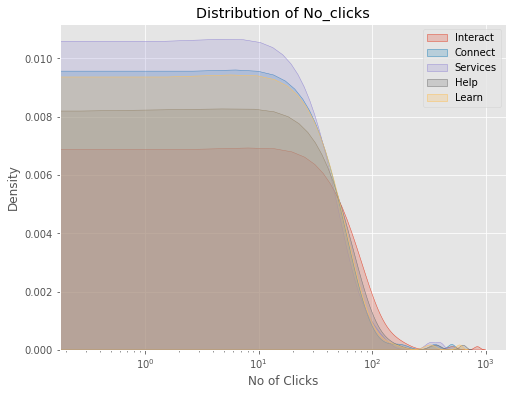

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))

ax = sns.kdeplot(df_filter.No_clicks[(df_filter["Version"] == 'Interact') ],
                 shade = True)
ax = sns.kdeplot(df_filter.No_clicks[(df_filter["Version"] == 'Connect') ],
                ax =ax,  shade= True)
ax = sns.kdeplot(df_filter.No_clicks[(df_filter["Version"] == 'Services') ],
                 shade = True)
ax = sns.kdeplot(df_filter.No_clicks[(df_filter["Version"] == 'Help') ],
                ax =ax,  shade= True)
ax = sns.kdeplot(df_filter.No_clicks[(df_filter["Version"] == 'Learn') ],
                ax =ax,  shade= True)
   

ax.legend(["Interact","Connect", "Services", "Help", "Learn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('No of Clicks')
ax.set_xscale('log')
ax.set_title('Distribution of No_clicks')

According to the plot, we can see that data is not distributed normally.

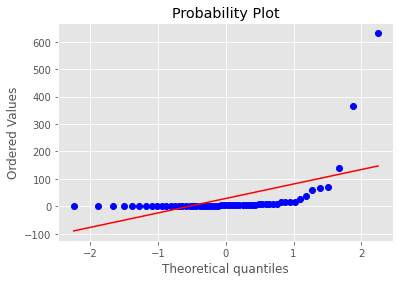

In [ ]:
##### check normality by QQ-plot #####

# QQ-plot for version `Help`
import scipy.stats as stats
stats.probplot(df_filter.No_clicks[df_filter['Version'] \
                                   == 'Help'], dist="norm", plot=plt)
plt.show()

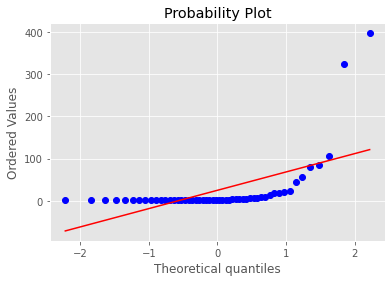

In [ ]:
# QQ-plot for version `Services`
import scipy.stats as stats
stats.probplot(df_filter.No_clicks[df_filter['Version'] \
                                   == 'Services'], dist="norm", plot=plt)
plt.show()

According to QQ-plot, for normal distribution the line should have an angle of 45 degrees. So we can see, that our data is not normally distributed.

In [ ]:
##### check normality by Shapiro test

# Shapiro test for version 'Help'
shapiro_test = scipy.stats.shapiro(sample2_help['No_clicks'])

matrix_twosample = [
    ['', 'shapiro_test', 'p-value'],
    ['Sample Data', shapiro_test[0], shapiro_test[1]]
]

twosample_table = ct(matrix_twosample, index=True)
twosample_table

In [ ]:
# Shapiro test for version 'Services'
shapiro_test = scipy.stats.shapiro(sample2_services['No_clicks'])

matrix_twosample = [
    ['', 'shapiro_test', 'p-value'],
    ['Sample Data', shapiro_test[0], shapiro_test[1]]
]

twosample_table = ct(matrix_twosample, index=True)
twosample_table

The p-value is less than 0.05, then the null hypothesis that the data are normally distributed is rejected.

**1.3 Read about Multiple comparison problem read ([wikipedia](https://en.wikipedia.org/wiki/Multiple_comparisons_problem), [An Overview of Methods to Address the Multiple Comparison Problem](https://towardsdatascience.com/an-overview-of-methods-to-address-the-multiple-comparison-problem-310427b3ba92) or other resources). What is the problem and when we need to do something about it (describe briefly)? (0.5 points)**

<font color='red'> **Answer:**

<font color='black'>

Multiple Comparisons Problem is a problem when standard statistical methods can show incorrect results due to the fact that sometimes a lot of hypothesises need to be checked. Such situation can lead researchers to wrong conclusions, because even when nothing happens some indicators are interpreted as significant ones. 

On the other hand,due to this problem we can reject a possibly correct hypothesis if its p-value is lower than the threshold. And if it's true, the total result could be not reliable.


> There are two main approaches of how to solve the problem:

1) Control overall α 

2) Control false discovery rate.



> According to the article, there are some procedures that can be applied:


*1) Bonferroni Correction*

*2) Sidak Correction*

*3) Holm’s Step-Down Procedure*

*4) Hochberg’s Step-Up Procedure*

*5) Tukey’s Procedure*

*6) Dunnet’s Correction*

**1.4 Load the dataset classifier_results.csv. The dataset contains the following fields:** 

**Dataset** - 200 datasets retreived from [OpenML](https://www.openml.org/search?type=data) dataset directory.

**Classifier** - 9 classifiers from scikit-learn

**Accuracy** - The accuracy achieved after applying the classifier to the dataset


**Is there a significant statistical difference between these classifiers ? If you were asked to continue your analysis with only a limited number of classifiers how many would you pick and why ? (1.0 points)** (Hint:You can use the orange package that was introduced in the practice session) 

In [ ]:
df_data  = pd.read_csv('classifier_results.csv')
df_data.head()

,Dataset,Classifier,Accuracy
0,dataset_53_heart-statlog.csv,KNeighborsClassifier,0.777778
1,dataset_53_heart-statlog.csv,GaussianProcessClassifier,0.481481
2,dataset_53_heart-statlog.csv,DecisionTreeClassifier,0.796296
3,dataset_53_heart-statlog.csv,RandomForestClassifier,0.796296
4,dataset_53_heart-statlog.csv,AdaBoostClassifier,0.777778


In [ ]:
import pandas as pd
df_perf = pd.read_csv('classifier_results.csv',index_col=False)
df_perf

,Dataset,Classifier,Accuracy
0,dataset_53_heart-statlog.csv,KNeighborsClassifier,0.777778
1,dataset_53_heart-statlog.csv,GaussianProcessClassifier,0.481481
2,dataset_53_heart-statlog.csv,DecisionTreeClassifier,0.796296
3,dataset_53_heart-statlog.csv,RandomForestClassifier,0.796296
4,dataset_53_heart-statlog.csv,AdaBoostClassifier,0.777778
...,...,...,...
162,pc1.csv,AdaBoostClassifier,0.941441
163,pc1.csv,QuadraticDiscriminantAnalysis,0.927928
164,pc1.csv,GradientBoostingClassifier,0.927928
165,pc1.csv,LinearDiscriminantAnalysis,0.932432


In [ ]:
import numpy as np
import pandas as pd
import matplotlib

matplotlib.use('agg')
import matplotlib.pyplot as plt

matplotlib.rcParams['font.family'] = 'sans-serif'
matplotlib.rcParams['font.sans-serif'] = 'Arial'

import operator
import math
from scipy.stats import wilcoxon
from scipy.stats import friedmanchisquare
import networkx

In [ ]:
# reference 1: https://github.com/hfawaz/cd-diagram
# reference 2: https://docs.orange.biolab.si/3/data-mining-library/reference/evaluation.cd.html

In [ ]:
df_perf = df_data

# count the number of tested datasets per classifier
df_counts = pd.DataFrame({'count': df_perf.groupby(
        ['Classifier']).size()}).reset_index()

# get the maximum number of tested datasets
max_nb_datasets = df_counts['count'].max()

# get the list of classifiers who have been tested on nb_max_datasets
classifiers = list(df_counts.loc[df_counts['count'] == max_nb_datasets]
                       ['Classifier'])

# get the number of classifiers
m = len(classifiers)

# compute the average ranks to be returned (useful for drawing the cd diagram)
# sort the dataframe of performances
sorted_df_perf = df_perf.loc[df_perf['Classifier'].isin(classifiers)]. \
        sort_values(['Classifier', 'Dataset'])

# get the rank data
rank_data = np.array(sorted_df_perf['Accuracy']).reshape(m, max_nb_datasets)

# create the data frame containg the accuracies
df_ranks = pd.DataFrame(data=rank_data, index=np.sort(classifiers), columns=
                        np.unique(sorted_df_perf['Dataset']))

In [ ]:
df_ranks

,dataset_37_diabetes.csv,dataset_53_heart-statlog.csv,dataset_59_ionosphere.csv,irish.csv,nalcatdata_cyyoung9302.csv,nalcatdata_reviewer.csv,openml_phpZNNasq.csv,pc1.csv,phpOJxGL9.csv,phpSOw1Kl.csv,phpSRnbqC.csv,phplVyjYQ.csv,phpn1jVwe.csv,phpoW7Dbi.csv,phpvz1IQW.csv,phpxijhaP.csv,phpy0HwUD.csv,phpysQLwp.csv,wine-quality-red.csv
AdaBoostClassifier,0.818182,0.777778,0.957746,1.00,0.894737,0.447368,1.000000,0.941441,0.735043,0.814815,0.702703,0.761905,0.985695,0.572016,0.952381,0.981757,0.375,0.692308,0.61250
DecisionTreeClassifier,0.805195,0.796296,0.943662,0.99,0.894737,0.434211,0.952381,0.927928,0.666667,0.888889,0.675676,0.666667,0.983460,0.572016,0.952381,0.830405,0.450,0.692308,0.63750
GaussianProcessClassifier,0.616883,0.481481,0.929577,0.84,0.736842,0.434211,1.000000,0.927928,0.623932,0.839506,0.567568,0.571429,0.983907,0.534979,0.857143,0.977027,0.275,0.692308,0.60000
GradientBoostingClassifier,0.785714,0.796296,0.943662,0.93,0.894737,0.434211,1.000000,0.927928,0.700855,0.777778,0.567568,0.714286,0.979437,0.551440,0.928571,0.934459,0.350,0.692308,0.64375
LinearDiscriminantAnalysis,0.824675,0.796296,0.915493,1.00,0.578947,0.434211,0.904762,0.932432,0.683761,0.925926,0.540541,0.666667,0.980778,0.637860,1.000000,0.982432,0.425,0.692308,0.61250
LogisticRegression,0.824675,0.814815,0.929577,1.00,0.842105,0.434211,1.000000,0.932432,0.709402,0.851852,0.594595,0.714286,0.983460,1.000000,0.952381,0.983784,0.425,0.846154,0.63750
QuadraticDiscriminantAnalysis,0.811688,0.777778,0.943662,0.84,0.842105,0.460526,0.523810,0.927928,0.606838,0.790123,0.567568,0.523810,0.976308,0.530864,0.880952,0.982432,0.425,0.615385,0.60000
RandomForestClassifier,0.811688,0.796296,0.957746,1.00,0.789474,0.421053,0.857143,0.927928,0.692308,0.851852,0.594595,0.666667,0.980331,0.596708,0.952381,0.975676,0.450,0.692308,0.60000


In [ ]:
# average the ranks
average_ranks = df_ranks.rank(ascending=False).mean(axis=1).sort_values(ascending=False)
list(average_ranks)

[6.157894736842105,
 6.078947368421052,
 4.947368421052632,
 4.552631578947368,
 4.184210526315789,
 4.184210526315789,
 3.0526315789473686,
 2.8421052631578947]

In [ ]:
!pip install Orange3

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


\classifier_name:
['KNeighborsClassifier' 'GaussianProcessClassifier'
 'DecisionTreeClassifier' 'RandomForestClassifier' 'AdaBoostClassifier'
 'QuadraticDiscriminantAnalysis' 'GradientBoostingClassifier'
 'LinearDiscriminantAnalysis' 'LogisticRegression']
the null hypothesis over the entire classifiers rejected

average_ranks:
GaussianProcessClassifier        6.157895
QuadraticDiscriminantAnalysis    6.078947
GradientBoostingClassifier       4.947368
RandomForestClassifier           4.552632
DecisionTreeClassifier           4.184211
LinearDiscriminantAnalysis       4.184211
AdaBoostClassifier               3.052632
LogisticRegression               2.842105
dtype: float64

p_values:
('GaussianProcessClassifier', 'LogisticRegression', 0.0003832007166730192, True)
('AdaBoostClassifier', 'GaussianProcessClassifier', 0.0005727638496021321, True)
('LogisticRegression', 'QuadraticDiscriminantAnalysis', 0.0015657471389352482, True)
('AdaBoostClassifier', 'QuadraticDiscriminantAnalysis', 0.0023

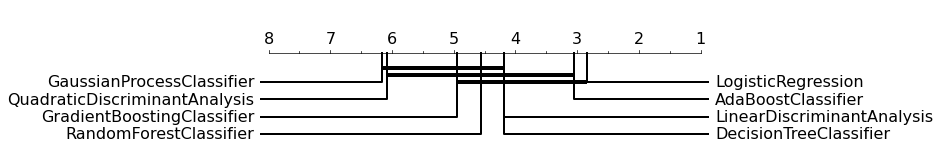

In [ ]:
# Author: Hassan Ismail Fawaz <hassan.ismail-fawaz@uha.fr>
#         Germain Forestier <germain.forestier@uha.fr>
#         Jonathan Weber <jonathan.weber@uha.fr>
#         Lhassane Idoumghar <lhassane.idoumghar@uha.fr>
#         Pierre-Alain Muller <pierre-alain.muller@uha.fr>
# License: GPL3

# https://github.com/hfawaz/cd-diagram

import numpy as np
import pandas as pd
import matplotlib

matplotlib.use('agg')
import matplotlib.pyplot as plt

matplotlib.rcParams['font.family'] = 'sans-serif'
matplotlib.rcParams['font.sans-serif'] = 'Arial'

import operator
import math
from scipy.stats import wilcoxon
from scipy.stats import friedmanchisquare
import networkx

# inspired from orange3 https://docs.orange.biolab.si/3/data-mining-library/reference/evaluation.cd.html
def graph_ranks(avranks, names, p_values, cd=None, cdmethod=None, lowv=None, highv=None,
                width=6, textspace=1, reverse=False, filename=None, **kwargs):
    """
    Draws a CD graph, which is used to display  the differences in methods'
    performance. See Janez Demsar, Statistical Comparisons of Classifiers over
    Multiple Data Sets, 7(Jan):1--30, 2006.

    Needs matplotlib to work.

    The image is ploted on `plt` imported using
    `import matplotlib.pyplot as plt`.

    Args:
        avranks (list of float): average ranks of methods.
        names (list of str): names of methods.
        cd (float): Critical difference used for statistically significance of
            difference between methods.
        cdmethod (int, optional): the method that is compared with other methods
            If omitted, show pairwise comparison of methods
        lowv (int, optional): the lowest shown rank
        highv (int, optional): the highest shown rank
        width (int, optional): default width in inches (default: 6)
        textspace (int, optional): space on figure sides (in inches) for the
            method names (default: 1)
        reverse (bool, optional):  if set to `True`, the lowest rank is on the
            right (default: `False`)
        filename (str, optional): output file name (with extension). If not
            given, the function does not write a file.
    """
    try:
        import matplotlib
        import matplotlib.pyplot as plt
        from matplotlib.backends.backend_agg import FigureCanvasAgg
    except ImportError:
        raise ImportError("Function graph_ranks requires matplotlib.")

    width = float(width)
    textspace = float(textspace)

    def nth(l, n):
        """
        Returns only nth elemnt in a list.
        """
        n = lloc(l, n)
        return [a[n] for a in l]

    def lloc(l, n):
        """
        List location in list of list structure.
        Enable the use of negative locations:
        -1 is the last element, -2 second last...
        """
        if n < 0:
            return len(l[0]) + n
        else:
            return n

    def mxrange(lr):
        """
        Multiple xranges. Can be used to traverse matrices.
        This function is very slow due to unknown number of
        parameters.

        >>> mxrange([3,5])
        [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2)]

        >>> mxrange([[3,5,1],[9,0,-3]])
        [(3, 9), (3, 6), (3, 3), (4, 9), (4, 6), (4, 3)]

        """
        if not len(lr):
            yield ()
        else:
            # it can work with single numbers
            index = lr[0]
            if isinstance(index, int):
                index = [index]
            for a in range(*index):
                for b in mxrange(lr[1:]):
                    yield tuple([a] + list(b))

    def print_figure(fig, *args, **kwargs):
        canvas = FigureCanvasAgg(fig)
        canvas.print_figure(*args, **kwargs)

    sums = avranks

    nnames = names
    ssums = sums

    if lowv is None:
        lowv = min(1, int(math.floor(min(ssums))))
    if highv is None:
        highv = max(len(avranks), int(math.ceil(max(ssums))))

    cline = 0.4

    k = len(sums)

    lines = None

    linesblank = 0
    scalewidth = width - 2 * textspace

    def rankpos(rank):
        if not reverse:
            a = rank - lowv
        else:
            a = highv - rank
        return textspace + scalewidth / (highv - lowv) * a

    distanceh = 0.25

    cline += distanceh

    # calculate height needed height of an image
    minnotsignificant = max(2 * 0.2, linesblank)
    height = cline + ((k + 1) / 2) * 0.2 + minnotsignificant

    fig = plt.figure(figsize=(width, height))
    fig.set_facecolor('white')
    ax = fig.add_axes([0, 0, 1, 1])  # reverse y axis
    ax.set_axis_off()

    hf = 1. / height  # height factor
    wf = 1. / width

    def hfl(l):
        return [a * hf for a in l]

    def wfl(l):
        return [a * wf for a in l]

    # Upper left corner is (0,0).
    ax.plot([0, 1], [0, 1], c="w")
    ax.set_xlim(0, 1)
    ax.set_ylim(1, 0)

    def line(l, color='k', **kwargs):
        """
        Input is a list of pairs of points.
        """
        ax.plot(wfl(nth(l, 0)), hfl(nth(l, 1)), color=color, **kwargs)

    def text(x, y, s, *args, **kwargs):
        ax.text(wf * x, hf * y, s, *args, **kwargs)

    line([(textspace, cline), (width - textspace, cline)], linewidth=0.7)

    bigtick = 0.1
    smalltick = 0.05
    linewidth = 2.0
    linewidth_sign = 4.0

    tick = None
    for a in list(np.arange(lowv, highv, 0.5)) + [highv]:
        tick = smalltick
        if a == int(a):
            tick = bigtick
        line([(rankpos(a), cline - tick / 2),
              (rankpos(a), cline)],
             linewidth=0.7)

    for a in range(lowv, highv + 1):
        text(rankpos(a), cline - tick / 2 - 0.05, str(a),
             ha="center", va="bottom", size=16)

    k = len(ssums)

    def filter_names(name):
        return name

    space_between_names = 0.24

    for i in range(math.ceil(k / 2)):
        chei = cline + minnotsignificant + i * space_between_names
        line([(rankpos(ssums[i]), cline),
              (rankpos(ssums[i]), chei),
              (textspace - 0.1, chei)],
             linewidth=linewidth)
        text(textspace - 0.2, chei, filter_names(nnames[i]), ha="right", va="center", size=16)

    for i in range(math.ceil(k / 2), k):
        chei = cline + minnotsignificant + (k - i - 1) * space_between_names
        line([(rankpos(ssums[i]), cline),
              (rankpos(ssums[i]), chei),
              (textspace + scalewidth + 0.1, chei)],
             linewidth=linewidth)
        text(textspace + scalewidth + 0.2, chei, filter_names(nnames[i]),
             ha="left", va="center", size=16)

    # no-significance lines
    def draw_lines(lines, side=0.05, height=0.1):
        start = cline + 0.2

        for l, r in lines:
            line([(rankpos(ssums[l]) - side, start),
                  (rankpos(ssums[r]) + side, start)],
                 linewidth=linewidth_sign)
            start += height
            print('drawing: ', l, r)

    # draw_lines(lines)
    start = cline + 0.2
    side = -0.02
    height = 0.1

    # draw no significant lines
    # get the cliques
    cliques = form_cliques(p_values, nnames)
    i = 1
    achieved_half = False
    print(f"\nnnames:\n{nnames}")
    for clq in cliques:
        if len(clq) == 1:
            continue
        print(clq)
        min_idx = np.array(clq).min()
        max_idx = np.array(clq).max()
        if min_idx >= len(nnames) / 2 and achieved_half == False:
            start = cline + 0.25
            achieved_half = True
        line([(rankpos(ssums[min_idx]) - side, start),
              (rankpos(ssums[max_idx]) + side, start)],
             linewidth=linewidth_sign)
        start += height


def form_cliques(p_values, nnames):
    """
    This method forms the cliques
    """
    # first form the numpy matrix data
    m = len(nnames)
    g_data = np.zeros((m, m), dtype=np.int64)
    for p in p_values:
        if p[3] == False:
            i = np.where(nnames == p[0])[0][0]
            j = np.where(nnames == p[1])[0][0]
            min_i = min(i, j)
            max_j = max(i, j)
            g_data[min_i, max_j] = 1

    g = networkx.Graph(g_data)
    return networkx.find_cliques(g)


def draw_cd_diagram(df_perf=None, alpha=0.05):
    p_values, average_ranks, _ = wilcoxon_holm(df_perf=df_perf, alpha=alpha)
    graph_ranks(average_ranks.values, average_ranks.keys(), p_values,
                cd=None, reverse=True, width=9, textspace=1.5)
    plt.savefig('cd-diagram.png',bbox_inches='tight')

def wilcoxon_holm(alpha=0.05, df_perf=None):
    """
    Applies the wilcoxon signed rank test between each pair of algorithm and then use Holm
    to reject the null's hypothesis
    """
    print(f"\classifier_name:\n{pd.unique(df_perf['Classifier'])}")
    # count the number of tested datasets per classifier
    df_counts = pd.DataFrame({'count': df_perf.groupby(
        ['Classifier']).size()}).reset_index()
    # get the maximum number of tested datasets
    max_nb_datasets = df_counts['count'].max()
    # get the list of classifiers who have been tested on nb_max_datasets
    classifiers = list(df_counts.loc[df_counts['count'] == max_nb_datasets]
                       ['Classifier'])
    # test the null hypothesis using friedman before doing a post-hoc analysis
    friedman_p_value = friedmanchisquare(*(
        np.array(df_perf.loc[df_perf['Classifier'] == c]['Accuracy'])
        for c in classifiers))[1]
    if friedman_p_value >= alpha:
        # then the null hypothesis over the entire classifiers cannot be rejected
        print('the null hypothesis over the entire classifiers cannot be rejected')
    else:
        print('the null hypothesis over the entire classifiers rejected')
          
        exit()
    # get the number of classifiers
    m = len(classifiers)
    # init array that contains the p-values calculated by the Wilcoxon signed rank test
    p_values = []
    # loop through the algorithms to compare pairwise
    for i in range(m - 1):
        # get the name of classifier one
        classifier_1 = classifiers[i]
        # get the performance of classifier one
        perf_1 = np.array(df_perf.loc[df_perf['Classifier'] == classifier_1]['Accuracy']
                          , dtype=np.float64)
        for j in range(i + 1, m):
            # get the name of the second classifier
            classifier_2 = classifiers[j]
            # get the performance of classifier one
            perf_2 = np.array(df_perf.loc[df_perf['Classifier'] == classifier_2]
                              ['Accuracy'], dtype=np.float64)
            # calculate the p_value
            p_value = wilcoxon(perf_1, perf_2, zero_method='pratt')[1]
            # appen to the list
            p_values.append((classifier_1, classifier_2, p_value, False))
    # get the number of hypothesis
    k = len(p_values)
    # sort the list in acsending manner of p-value
    p_values.sort(key=operator.itemgetter(2))

    # loop through the hypothesis
    for i in range(k):
        # correct alpha with holm
        new_alpha = float(alpha / (k - i))
        # test if significant after holm's correction of alpha
        if p_values[i][2] <= new_alpha:
            p_values[i] = (p_values[i][0], p_values[i][1], p_values[i][2], True)
        else:
            # stopclassifiers
            break
    # compute the average ranks to be returned (useful for drawing the cd diagram)
    # sort the dataframe of performances
    sorted_df_perf = df_perf.loc[df_perf['Classifier'].isin(classifiers)]. \
        sort_values(['Classifier', 'Dataset'])
    # get the rank data
    rank_data = np.array(sorted_df_perf['Accuracy']).reshape(m, max_nb_datasets)

    # create the data frame containg the accuracies
    df_ranks = pd.DataFrame(data=rank_data, index=np.sort(classifiers), columns=
    np.unique(sorted_df_perf['Dataset']))

    # number of wins
    dfff = df_ranks.rank(ascending=False)
    
    #print(f"\nnumber of wins:\n{dfff[dfff == 1.0].sum(axis=1)}")

    # average the ranks
    average_ranks = df_ranks.rank(ascending=False).mean(axis=1).sort_values(ascending=False)
    print(f"\naverage_ranks:\n{average_ranks}")
    # return the p-values and the average ranks
    print(f"\np_values:")
    for pp in p_values:
          print(f"{pp}")
#           if friedman_p_value >= alpha:
#             # then the null hypothesis over the entire classifiers cannot be rejected
#             print('the null hypothesis over the entire classifiers cannot be rejected')
            
    return p_values, average_ranks, max_nb_datasets

df_perf = pd.read_csv('classifier_results.csv',index_col=False)

draw_cd_diagram(df_perf=df_perf)

<font color='red'> **Answer:** <font color='black'> There is a significant statistical difference between classifiers. 

According to the plot, I would choose two classifiers: `Gaussian Process Classifier` and `Quadratic Discriminant Analysis`. Because as it shown by the average ranks, these classifiers have the highest rankings: `6.157895` and `6.078947` accordingly.



# 2. Uplift modelling (5 points)
For this task we are going to use email_marketing.csv from [MineThatData](https://blog.minethatdata.com/2008/03/minethatdata-e-mail-analytics-and-data.html). The data was recorded from a two-weeks email campaign that included 64000 customers. Out of these customers:
1. 1/3 were randomly chosen to receive an e-mail campaign featuring Mens merchandise.
2. 1/3 were randomly chosen to receive an e-mail campaign featuring Womens merchandise.
3. 1/3 were randomly chosen to not receive an e-mail campaign.

The features in this dataset include:

- Recency: Months since last purchase.
- History: Actual dollar value spent in the past year.
- Mens: 1/0 indicator, 1 = customer purchased Mens merchandise in the past year.
- Womens: 1/0 indicator, 1 = customer purchased Womens merchandise in the past year.
- Zip_Code: Classifies zip code as Urban, Suburban, or Rural.
- Newbie: 1/0 indicator, 1 = New customer in the past twelve months.
- Channel: Describes the channels the customer purchased from in the past year.
- Segment: e-mail campaign  type that the customer received
- Visit: 1/0 indicator, 1 = Customer visited website in the following two weeks.

The last variable is realted to the evaluation if the campaign was effective or not.

- Conversion: 1/0 indicator, 1 = Customer purchased merchandise in the following two weeks.


In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('email_marketing.csv', header=0 )
df.head()

,recency,history_segment,history,mens,womens,zip_code,newbie,channel,segment,visit,conversion,spend
0,10,2) $100 - $200,142.44,1,0,Surburban,0,Phone,Womens E-Mail,0,0,0.0
1,6,3) $200 - $350,329.08,1,1,Rural,1,Web,No E-Mail,0,0,0.0
2,7,2) $100 - $200,180.65,0,1,Surburban,1,Web,Womens E-Mail,0,0,0.0
3,9,5) $500 - $750,675.83,1,0,Rural,1,Web,Mens E-Mail,0,0,0.0
4,2,1) $0 - $100,45.34,1,0,Urban,0,Web,Womens E-Mail,0,0,0.0


**2.1 Use the function calc_uplift() from the practice session to calculate the current uplift of the campaign. Remeber to modify the function according to the need. (0.5 points)**

In [ ]:
#function for calculating the uplift
def calc_uplift(df):
    avg_women_spent = df[df.segment == 'Womens E-Mail']['history'].mean()
    avg_men_spent = df[df.segment == 'Mens E-Mail']['history'].mean()
    
    #calculate conversions for each offer type
    base_conv = df[df.segment == 'No E-Mail']['conversion'].mean() # no offer
    women_conv = df[df.segment == 'Womens E-Mail']['conversion'].mean() # women's e-mail
    men_conv = df[df.segment == 'Mens E-Mail']['conversion'].mean() # men's e-mail
    
    #calculate conversion uplift for women's and men's campaign
    women_conv_uplift = women_conv - base_conv   # uplift = treated - control
    men_conv_uplift = men_conv - base_conv   # uplift = treated - control
    
    #calculate order uplift
    women_order_uplift = women_conv_uplift * len(df[df.segment == 'Womens E-Mail']['conversion'])
    men_order_uplift = men_conv_uplift * len(df[df.segment == 'Mens E-Mail']['conversion'])
    
    #calculate revenue uplift
    women_rev_uplift = women_order_uplift * avg_women_spent
    men_rev_uplift = men_order_uplift * avg_men_spent

    if len(df[df.segment == 'Womens E-Mail']['conversion']) > 0:

      print(f"Total Targeted Customer Count: {len(df[df.segment == 'Womens E-Mail']['conversion'])}")
      print('Women Conversion Uplift: {0}%'.format(np.round(women_conv_uplift*100,2))) # uplift score %
      print('Women Order Uplift: {0}'.format(np.round(women_order_uplift,2)))
      print('Women Revenue Uplift: ${0}\n'.format(np.round(women_rev_uplift,2)))
    
    if len(df[df.segment == 'Mens E-Mail']['conversion']) > 0:
          
      print('-------------- \n')
      print(f"Total Targeted Customer Count: { len(df[df.segment == 'Mens E-Mail']['conversion'])}")
      print('Men Conversion Uplift: {0}%'.format(np.round(men_conv_uplift*100,2))) # uplift score %
      print('Men Order Uplift: {0}'.format(np.round(men_order_uplift,2)))
      print('Men Revenue Uplift: ${0}'.format(np.round(men_rev_uplift,2)))

calc_uplift(df)

Total Targeted Customer Count: 21387
Women Conversion Uplift: 0.31%
Women Order Uplift: 66.54
Women Revenue Uplift: $16137.46

-------------- 

Total Targeted Customer Count: 21307
Men Conversion Uplift: 0.68%
Men Order Uplift: 144.99
Men Revenue Uplift: $35209.82


**2.2 Create a new column named target_class. Split the customers in 4 categories:**

1- Treatment Responders 

2- Treatment Non-Responders (sleeping dogs)

3- Control Responders (sure things)

4-Control Non-Responders(lost causes).

**Label encode these categories and store the result for each customer in the column target_class (0.5 points)**

In [ ]:
# from __future__ import division

# from datetime import datetime, timedelta,date
# import pandas as pd
# %matplotlib inline
# from sklearn.metrics import classification_report,confusion_matrix
# import matplotlib.pyplot as plt
# import numpy as np
# import seaborn as sns
# from sklearn.cluster import KMeans

# import chart_studio.plotly as py
# import plotly.offline as pyoff
# import plotly.graph_objs as go

import sklearn
import xgboost as xgb
from sklearn.model_selection import KFold, cross_val_score, train_test_split
import warnings
warnings.filterwarnings("ignore")


df['campaign_group'] = 'treatment'
df.loc[df.segment == 'No E-Mail', 'campaign_group'] = 'control' # filter for control group


df['target_class'] = 0 #CN 
df.loc[(df.campaign_group == 'control') & (df.conversion > 0),'target_class'] = 1 #CR
df.loc[(df.campaign_group == 'treatment') & (df.conversion == 0),'target_class'] = 2 #TN
df.loc[(df.campaign_group == 'treatment') & (df.conversion > 0),'target_class'] = 3 #TR

df.head(10)

,recency,history_segment,history,mens,womens,zip_code,newbie,channel,segment,visit,conversion,spend,campaign_group,target_class
0,10,2) $100 - $200,142.44,1,0,Surburban,0,Phone,Womens E-Mail,0,0,0.0,treatment,2
1,6,3) $200 - $350,329.08,1,1,Rural,1,Web,No E-Mail,0,0,0.0,control,0
2,7,2) $100 - $200,180.65,0,1,Surburban,1,Web,Womens E-Mail,0,0,0.0,treatment,2
3,9,5) $500 - $750,675.83,1,0,Rural,1,Web,Mens E-Mail,0,0,0.0,treatment,2
4,2,1) $0 - $100,45.34,1,0,Urban,0,Web,Womens E-Mail,0,0,0.0,treatment,2
5,6,2) $100 - $200,134.83,0,1,Surburban,0,Phone,Womens E-Mail,1,0,0.0,treatment,2
6,9,3) $200 - $350,280.20,1,0,Surburban,1,Phone,Womens E-Mail,0,0,0.0,treatment,2
7,9,1) $0 - $100,46.42,0,1,Urban,0,Phone,Womens E-Mail,0,0,0.0,treatment,2
8,9,5) $500 - $750,675.07,1,1,Rural,1,Phone,Mens E-Mail,0,0,0.0,treatment,2
9,10,1) $0 - $100,32.84,0,1,Urban,1,Web,Womens E-Mail,0,0,0.0,treatment,2


In [ ]:
gr = ['CN', 'CR', "TN", "TR"]
i=0
for d in df.target_class.value_counts()/len(df):
  print(f"{gr[i]}: {d}\n")
  i+=1

CN: 0.65996875

CR: 0.331

TN: 0.007125

TR: 0.00190625



**2.3 Apply the necessary preprocessing to the data and split it into train and test set, using 80/20 ratio. Remember that you have to drop the columns that define the label and perform preprocessing. Build a model with your classifier of choice that will predict probabilities for the categories mentioned in 2.1. (1.5 points)**

In [ ]:
df_model = df.drop(['segment','campaign_group','conversion'],axis=1)
df_model = pd.get_dummies(df_model)

#create feature set and labels
X = df_model.drop(['target_class'],axis=1)
y = df_model.target_class


#splitting train and test groups
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=56)

#fitting the model and predicting the probabilities
xgb_model = xgb.XGBClassifier().fit(X_train, y_train)
class_probs = xgb_model.predict_proba(X_test)

# Let's look at the first test prediction, as an example
gr = ['CN', 'CR', "TN", "TR"]
i=0
for d in class_probs[0]:
  print(f"{gr[i]}: {d}\n")
  i+=1

CN: 0.3407061994075775

CR: 0.0010258727706968784

TN: 0.6572420597076416

TR: 0.0010258727706968784



**2.4 Calculate the uplift score using probabilities for all customers and store the results to a new column in the dataframe (0.5 points)**

In [ ]:
#probabilities for all customers
overall_proba = xgb_model.predict_proba(df_model.drop(['target_class'],axis=1))

#assign probabilities to 4 different columns
df_model['proba_CN'] = overall_proba[:,0] 
df_model['proba_CR'] = overall_proba[:,1] 
df_model['proba_TN'] = overall_proba[:,2] 
df_model['proba_TR'] = overall_proba[:,3]

#calculate uplift score for all customers
df_model['uplift_score'] = df_model.eval('proba_CN + proba_TR - proba_TN - proba_CR')

#assign it back to main dataframe
df['uplift_score'] = df_model['uplift_score']

df.head()

,recency,history_segment,history,mens,womens,zip_code,newbie,channel,segment,visit,conversion,spend,campaign_group,target_class,uplift_score
0,10,2) $100 - $200,142.44,1,0,Surburban,0,Phone,Womens E-Mail,0,0,0.0,treatment,2,-0.297763
1,6,3) $200 - $350,329.08,1,1,Rural,1,Web,No E-Mail,0,0,0.0,control,0,-0.298429
2,7,2) $100 - $200,180.65,0,1,Surburban,1,Web,Womens E-Mail,0,0,0.0,treatment,2,-0.295670
3,9,5) $500 - $750,675.83,1,0,Rural,1,Web,Mens E-Mail,0,0,0.0,treatment,2,-0.295419
4,2,1) $0 - $100,45.34,1,0,Urban,0,Web,Womens E-Mail,0,0,0.0,treatment,2,-0.311526


**2.5  Select the customers with High Uplift Score as below:**
    
**High Uplift Score:** Customers have uplift score > 3rd quantile

**a. Calculate the ratio of the customers targeted with Womens e-mail that have high uplift score over the total customers who received emails featuring Womens merchandise. (0.5 points)**

**b. Calculate the ratio of the customers targeted with Mens e-mail that have high uplift score over the total customers who received emails featuring Mens merchandise. (0.5 points)**


**c.Which one of the campaigns would you say is more successful ? (0.5 points)**


In [ ]:
# a. Calculate the ratio of the customers targeted with Womens e-mail that have high uplift score over the total customers who received emails featuring Womens merchandise.
uplift_q_75 = df.uplift_score.quantile(0.75)

df_data_women = df.copy()
df_data_women = df_data_women[(df_data_women.segment == 'Womens E-Mail')].reset_index(drop=True)

df_data_women_lift = df_data_women[(df_data_women.uplift_score > uplift_q_75)].reset_index(drop=True)

women_lift = len(df_data_women_lift) / len(df_data_women)
print('Ratio of the customers targeted with Womens e-mail that have high uplift score over the total customers who received emails featuring Womens merchandise: {0}'.format(women_lift))

# b. Calculate the ratio of the customers targeted with Mens e-mail that have high uplift score over the total customers who received emails featuring Mens merchandise.
df_data_men = df.copy()
df_data_men = df_data_men[(df_data_men.segment == 'Mens E-Mail')].reset_index(drop=True)

df_data_men_lift = df_data_men[(df_data_men.uplift_score > uplift_q_75)].reset_index(drop=True)

men_lift = len(df_data_men_lift) / len(df_data_men)
print('Ratio of the customers targeted with Mens e-mail that have high uplift score over the total customers who received emails featuring Mens merchandise: {0}'.format(men_lift))

Ratio of the customers targeted with Womens e-mail that have high uplift score over the total customers who received emails featuring Womens merchandise: 0.2340206667601814
Ratio of the customers targeted with Mens e-mail that have high uplift score over the total customers who received emails featuring Mens merchandise: 0.23729290843384804


<font color='red'> **Answer C:** </font> I would say that the campaign featuring mens merchandise is more successful, because the customers who were targeted with that campaign had a higher uplift score compared to the other campaign. However, the difference is not very  significant.

**2.6 For customers in the segment named "Womens e-mail" with high uplift score calculate conversion uplift and revenue uplift. Compare it with the benchmark from excercise 2.1 and draw conclusions. (0.5 points)**

In [ ]:
df_data_women_lift_and_control = df.copy()
df_data_women_lift_and_control = df_data_women_lift_and_control[(df_data_women_lift_and_control.segment != 'Mens E-Mail')].reset_index(drop=True)
df_data_women_lift_and_control = df_data_women_lift_and_control[(df_data_women_lift_and_control.uplift_score > uplift_q_75)].reset_index(drop=True)
calc_uplift(df_data_women_lift_and_control)

Total Targeted Customer Count: 5005
Women Conversion Uplift: 1.7%
Women Order Uplift: 84.92
Women Revenue Uplift: $27893.27



<font color='red'> **Answer:** </font> The conversion and revenue uplift are significantly greater than in the benchmark in excercise 2.1. The conversion uplift is over five times greater and the revenue uplift has increased by over 50%. This indicates that a marketing campaign targeting the customer segment with high uplift score would be much more efficient and successful than a randomly selected marketing campaign.